#### Synthetic zeeman and polarization data Reconstruction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_gen as dg
import recon_funcs as rf
import Sampler as sampler 

Using geometry, can derive the magnitude of the magnetic field wrt the LOS strength and cos2g

\begin{align}
    \cos^2\gamma &= \frac{bx^2+by^2}{bx^2+by^2+bz^2} = \frac{B_{pos}^2}{B^2}\\
    \sin^2\gamma &= 1 - \cos^2\gamma\\
    \cos\gamma &= \frac{B_{pos}}{B} \\
    \sin\gamma &= \frac{B_{los}}{B} \\
    \sin^2\gamma &= 1 - \cos^2\gamma = \frac{B_{los}^2}{B^2}\\
    B^2 &= \frac{B_{los}^2}{1 - \cos^2\gamma} \\
    B &= \frac{B_{los}}{\sqrt{1 - \cos^2\gamma}}\\
\end{align}

Using the equations above, create a new reconstruction method for when you have Stokes U/Q and Zeeman Info

In [2]:
# def zeeman_recon(U, Q, COS2G, BLOS, plotting):
#     nx, ny = U.shape[0], U.shape[0]
#     x = np.linspace(0, 2*np.pi, nx)
#     y = np.linspace(0, 2*np.pi, ny)
#     X, Y = np.meshgrid(x, y, indexing="xy")

#     # Step 1. Plane-of-sky orientation from Q,U
#     phi = 0.5 * np.arctan2(U, Q)   # polarization angle

#     # Step 2. Field magnitude from cos²γ and Zeeman
#     Bmag = BLOS / np.sqrt(1 - COS2G)

#     # Step 3. POS amplitude
#     Bperp = np.sqrt(np.maximum(Bmag**2 - BLOS**2, 0))

#     # Step 4. LOS component from Zeeman directly
#     bz = BLOS.copy()
    
#     # Step 5. Scale bx, by
#     bx = np.sin(phi) * Bperp
#     by = np.cos(phi) * Bperp

#     # Total magnitude
#     Btot = np.sqrt(bx**2 + by**2 + bz**2)

#     # print(np.max(Btot))

#     # Diagnostics / plotting
#     if plotting == 1:
#         fig, ax = plt.subplots(1, 5, figsize=(22,4))

#         im0 = ax[0].imshow(bx, origin="lower", cmap="RdBu")
#         ax[0].set_title("Bx map")
#         plt.colorbar(im0, ax=ax[0],fraction=0.046, pad=0.04)

#         im1 = ax[1].imshow(by, origin="lower", cmap="RdBu")
#         ax[1].set_title("By map")
#         plt.colorbar(im1, ax=ax[1],fraction=0.046, pad=0.04)

#         im2 = ax[2].imshow(bz, origin="lower", cmap="RdBu")
#         ax[2].set_title("Bz map (Zeeman)")
#         plt.colorbar(im2, ax=ax[2],fraction=0.046, pad=0.04)

#         im3 = ax[3].imshow(Bmag, origin="lower", cmap="viridis")
#         ax[3].set_title("|B| total magnitude")
#         plt.colorbar(im3, ax=ax[3],fraction=0.046, pad=0.04)

#         # Quiver plot: POS field vectors
#         step = 1   # downsample arrows
#         ax[4].imshow(Bperp, origin="lower", cmap="viridis")
#         i = np.arange(0, nx, step)
#         j = np.arange(0, ny, step)
#         ax[4].quiver(j, i, by[::step, ::step], bx[::step, ::step],
#                     color="red", headaxislength=0, headlength=0, headwidth=1, pivot='middle')
#         ax[4].set_title("POS field (bx, by)")

#         plt.tight_layout()
#         plt.show()

#         # step = 3
#         # rf.visualize_3d(bx[::step, ::step], by[::step, ::step], bz[::step, ::step], name='Input Wavy Field',plotdex='ij')
#         # plt.show()

#         # rf.visualize_25d(bx[::step, ::step], by[::step, ::step], bz[::step, ::step], name='Input Wavy Field',plotdex='ij')
#         # plt.show()
    
#     return bx,by,bz

### Wavy Field Test

Generates Synthetic Polarization and Zeeman data for a Wavy Field


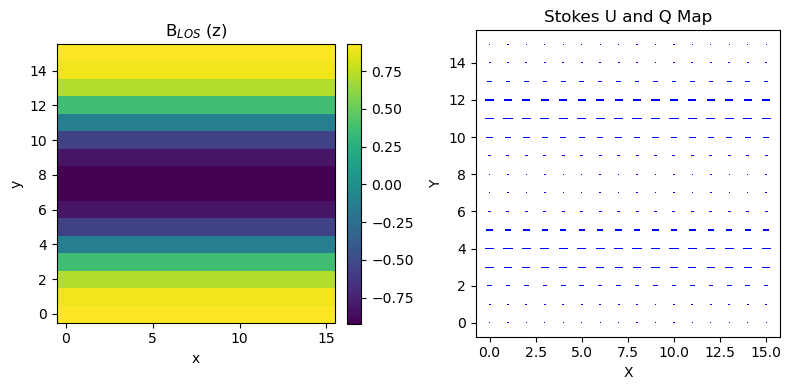

In [3]:
u, q, cos, blos, bx, by, bz = dg.wavy_zeeman_pol(box_length=16, amplitude=1.2, frequency=1, x_const=0, plotting=1)


In [4]:
print(np.shape(u))
U_array = [u,q,cos,blos]

(16, 16)


(16, 16) (16, 16)


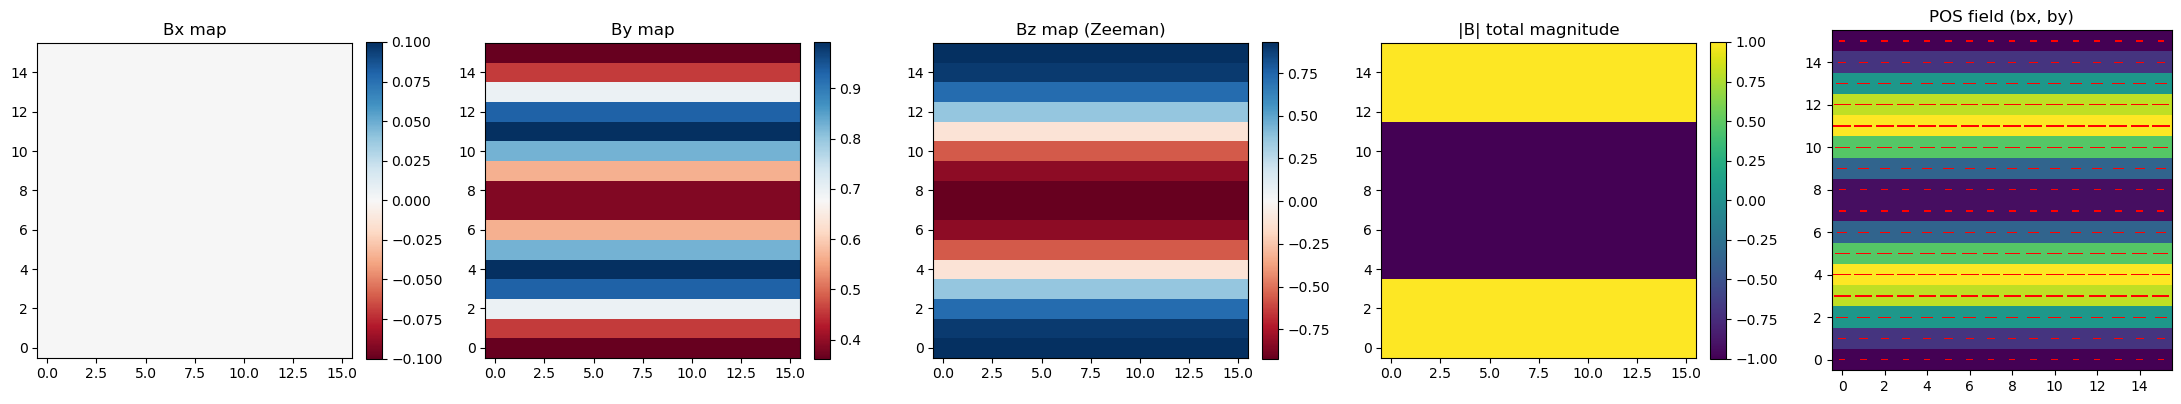

In [5]:
bxr, byr, bzr = rf.zeeman_recon(U_array, plotting=1)

icos2g  = (bxr**2+byr**2)/(bxr**2+byr**2+bzr**2)
iq      = (byr**2-bxr**2)/(bxr**2+byr**2) * icos2g
iu      = 2*bxr*byr/(bxr**2+byr**2) * icos2g



In [6]:
# resy = np.sqrt(np.mean((bx-bxr)**2 + (by-byr)**2 + (bz-bzr)**2))
residual = np.sqrt(np.mean((iu-u)**2 + (iq-q)**2))
print(residual)


6.904112261803402e-17


In [ ]:
residual_array = []
x_value = []
amp_array = []
freq_array = []

for f in np.linspace(0.1,10,1000):
    u, q, cos, blos, bx, by, bz = wavy_zeeman_pol(box_length=16, amplitude=1.2, frequency=f, x_const=0, plotting=0)
    bxr, byr, bzr = rf.zeeman_recon(u, q, cos, blos, plotting=0)

    icos2g  = (bxr**2+byr**2)/(bxr**2+byr**2+bzr**2)
    iq      = (byr**2-bxr**2)/(bxr**2+byr**2) * icos2g
    iu      = 2*bxr*byr/(bxr**2+byr**2) * icos2g

    residual = np.sqrt(np.mean((iu-u)**2 + (iq-q)**2))
    residual_array.append(residual)
    # x_value.append(ix)
    # amp_array.append(ia)
    freq_array.append(f)


Text(0.5, 1.0, 'LOS 2.5D Recon Test Wavy Field')

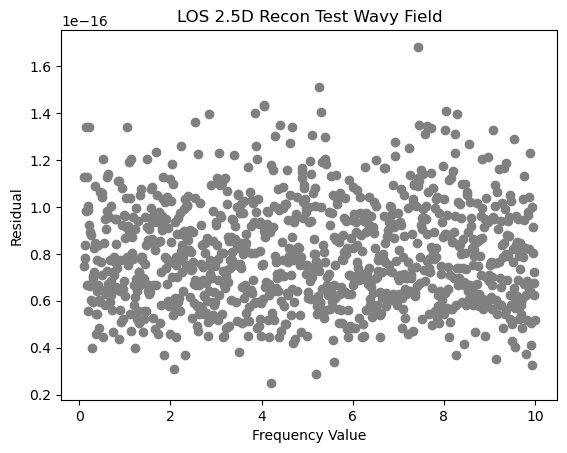

In [9]:
plt.plot(freq_array, residual_array, marker='o', linestyle='none', color = 'gray')
plt.ylabel('Residual')
plt.xlabel('Frequency Value')
plt.title('LOS 2.5D Recon Test Wavy Field')

Text(0.5, 0, 'run')

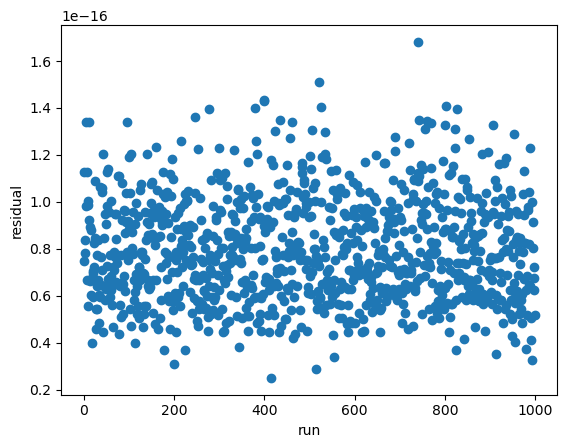

In [10]:
plt.plot(range(len(residual_array)), residual_array, marker='o', linestyle='none')
plt.ylabel('residual')
plt.xlabel('run')

### Torodial Field Test

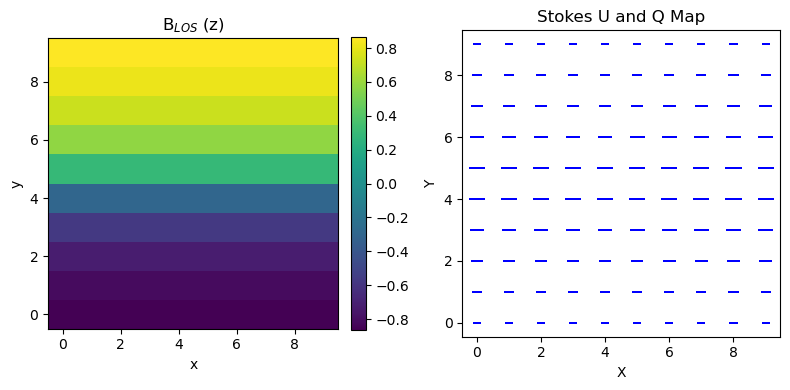

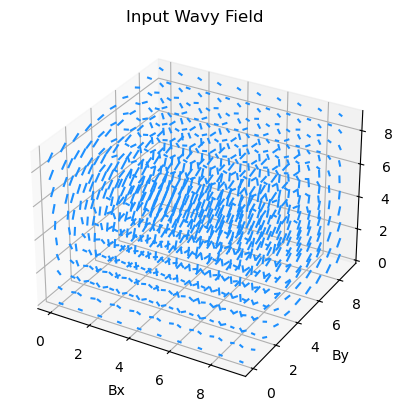

In [11]:
u, q, cos, blos, bx, by, bz = dg.torodial_zeeman_pol(box_length=10,alpha=0,plotting=1)

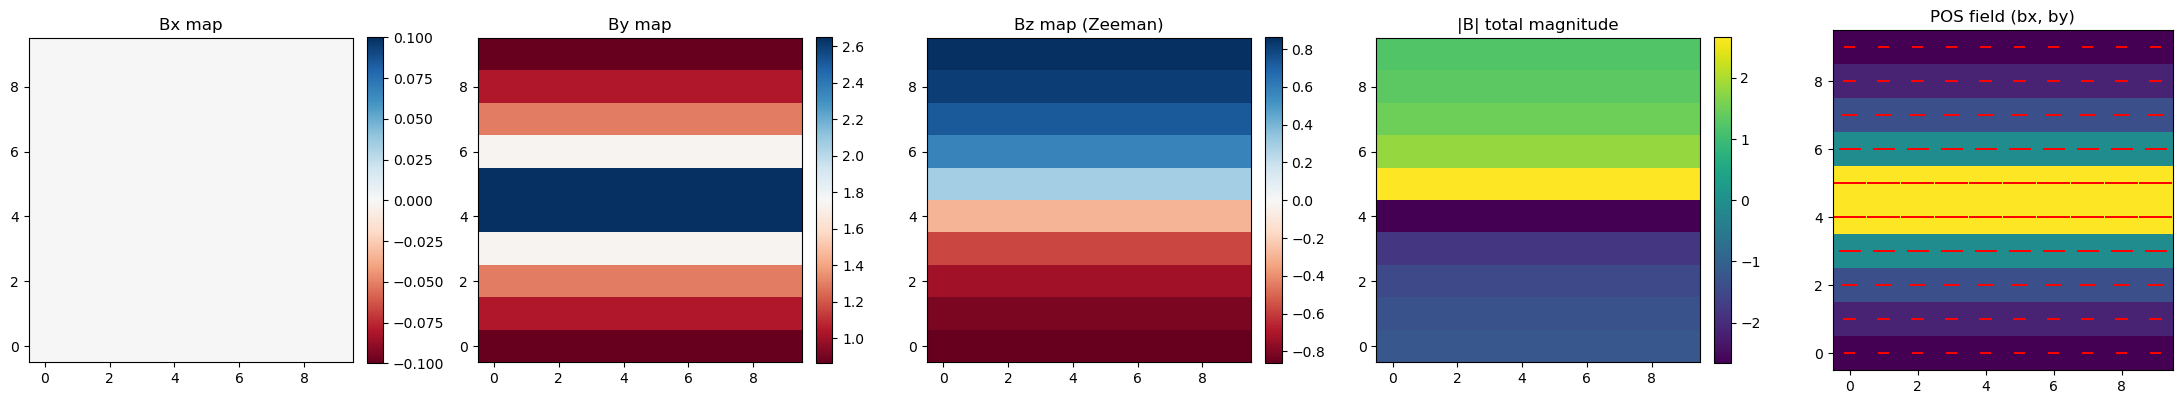

In [ ]:
bxr, byr, bzr = rf.zeeman_recon(u, q, cos, blos, plotting=1)

icos2g  = (bxr**2+byr**2)/(bxr**2+byr**2+bzr**2)
iq      = (byr**2-bxr**2)/(bxr**2+byr**2) * icos2g
iu      = 2*bxr*byr/(bxr**2+byr**2) * icos2g


In [13]:
residual = np.sqrt(np.mean((iu-u)**2 + (iq-q)**2))
print(residual)

3.510833468576701e-17


In [ ]:
residual_array = []
alpha_array = []

for ia in np.linspace(0.1,10,1000):
    u, q, cos, blos, bx, by, bz = dg.torodial_zeeman_pol(box_length=10,alpha=ia,plotting=0)
    bxr, byr, bzr = rf.zeeman_recon(u, q, cos, blos, plotting=0)

    icos2g  = (bxr**2+byr**2)/(bxr**2+byr**2+bzr**2)
    iq      = (byr**2-bxr**2)/(bxr**2+byr**2) * icos2g
    iu      = 2*bxr*byr/(bxr**2+byr**2) * icos2g

    residual = np.sqrt(np.mean((iu-u)**2 + (iq-q)**2))
    residual_array.append(residual)
    alpha_array.append(ia)



Text(0.5, 1.0, 'LOS 2.5D Recon Test Torodial Field')

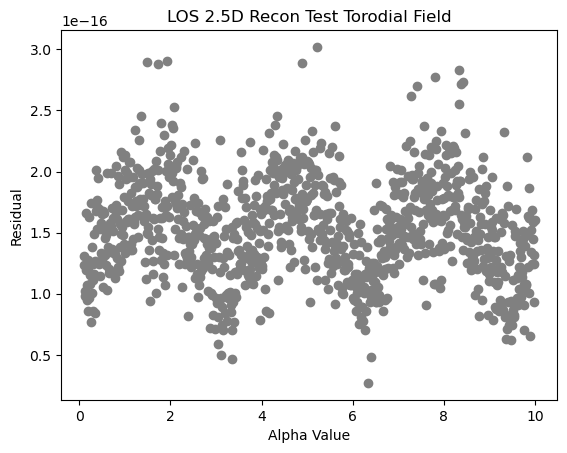

In [16]:
plt.plot(alpha_array, residual_array, marker='o', linestyle='none', color = 'gray')
plt.ylabel('Residual')
plt.xlabel('Alpha Value')
plt.title('LOS 2.5D Recon Test Torodial Field')

Use this program below later, when I need to start making REAL synthetic zeeman maps. 
Maybe implement with Athena++. 
For now, I can just use what I have above. 

In [ ]:
# def synthetic_zeeman_pol_wvy(box_length,amplitude,frequency,y_const,plotting):

#     x = np.linspace(0, 2*np.pi, box_length)
#     y = np.linspace(0, 2*np.pi, box_length)
#     z = np.linspace(0, 2*np.pi, box_length)
#     X, Y, Z = np.meshgrid(x, y, z, indexing="xy")

#     # field geoemtry - wavy
#     angle = amplitude * np.cos(frequency * Y)
#     Bx = np.full_like(X, y_const)      
#     Bz = np.sin(angle)                 
#     By = np.cos(angle)

#     # calculate Stokes U/Q/Cos2g
#     cos2g         = (Bx**2+By**2)/(Bx**2+By**2+Bz**2)
#     q             = (By**2-Bx**2)/(Bx**2+By**2) * cos2g
#     u             = 2*Bx*By/(Bx**2+By**2) * cos2g
#     phi           = 0.5*np.arctan2(u,q)
#     pol           = np.sqrt(u**2+q**2) # which is the same as cos2g in this approach

#     los = np.array([0., 0., 1.])   # unit vector; change as desired
#     los = los / np.linalg.norm(los)

#     # compute B_parallel field: pointwise dot product
#     B_parallel_3d = los[0]*Bx + los[1]*By + los[2]*Bz   # shape (nx,ny,nz)

#     # integrate or average along LOS axis.
#     # If LOS is along z, the axis to collapse is index 2 (the third axis).
#     B_los_map = np.mean(B_parallel_3d, axis=2)   # shape (nx, ny)

#     # Fake spectral line parameters (arbitrary, non-physical)
#     nv = 512
#     v = np.linspace(-5.0, 5.0, nv)   # velocity (or freq) axis in arbitrary units
#     sigma_v = 0.6                    # line width
#     I0 = 1.0                         # peak intensity

#     # weak-Zeeman proportionality constant (choose units so signal is visible)
#     # In real physics this depends on line rest freq and Landé g; here treat as tunable scalar
#     zeta = 0.2   # (velocity unit per unit B) -- tune to get visible splitting

#     # precompute base line (centered at v=0)
#     base_line = I0 * np.exp(-0.5 * (v/sigma_v)**2)

#     nx, ny = box_length, box_length
#     I_cube = np.zeros((nx, ny, nv))
#     V_cube = np.zeros((nx, ny, nv))

#     # loop over sightlines 
#     for i in range(nx):
#         for j in range(ny):
#             Bbar = B_los_map[i, j]                 # LOS field for that pixel
#             delta_v = zeta * Bbar                  # shift of sigma units
#             # Shifted right/left circular polarization profiles:
#             # RCP shifted to +delta, LCP shifted to -delta (or vice versa depending sign convention)
#             I_R = I0 * np.exp(-0.5 * ((v - delta_v)/sigma_v)**2)
#             I_L = I0 * np.exp(-0.5 * ((v + delta_v)/sigma_v)**2)
#             I = 0.5*(I_R + I_L)
#             V = I_R - I_L                          # circular pol. difference (Stokes V)
#             I_cube[i, j] = I
#             V_cube[i, j] = V

#     # Add gaussian observational noise (optional)
#     noise_rms = 5e-3
#     rng = np.random.default_rng(42)
#     V_cube += rng.normal(scale=noise_rms, size=V_cube.shape)
#     I_cube += rng.normal(scale=noise_rms, size=I_cube.shape)

#     # Diagnostics: maps you might want
#     # peak amplitude of V (signed) maximum circular polarization signal at each picel. Observable = 'Zeeman detection strength"
#     V_peak = np.max(V_cube, axis=2)  
#     # integrated absolute V (a simple proxy) Rough measure of total Polarized signal across line
#     V_int = np.trapezoid(np.abs(V_cube), x=v, axis=2)

#     # grab first slice of Stokes U/Q/COS2G
#     U = u[:,:,0]
#     Q = q[:,:,0]
#     COS = cos2g[:,:,0]


#     if plotting == 1:
#         # Plot B_los_map
#         fig, ax = plt.subplots(2,2, figsize=(8,8))
#         im0 = ax[0,0].imshow(B_los_map.T, origin='lower')#, extent=[x.min(), x.max(), y.min(), y.max()])
#         ax[0,0].set_title(r'B$_{LOS}$ (z)')
#         ax[0,0].set_xlabel('x')
#         ax[0,0].set_ylabel('y')
#         plt.colorbar(im0, ax=ax[0,0])
#         # Plot V_peak
#         im1 = ax[1,0].imshow(V_peak.T, origin='lower')#, extent=[x.min(), x.max(), y.min(), y.max()])
#         ax[1,0].set_title('peak Stokes V')
#         ax[1,0].set_xlabel('x')
#         ax[1,0].set_ylabel('y')
#         plt.colorbar(im1, ax=ax[1,0])

#         # plot sample spectrum at center pixel
#         i0, j0 = nx//2, ny//2
#         ax[1,1].plot(v, I_cube[i0, j0], label='I')
#         ax[1,1].plot(v, V_cube[i0, j0], label='V (x10)')
#         ax[1,1].plot(v, 10*V_cube[i0, j0], label='10*V')  # scaled so visible
#         ax[1,1].legend()
#         ax[1,1].set_title(f'Spectra at pixel ({i0},{j0})')

#         # plot stokes U and Q Map
#         X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]), indexing='ij')
#         factor = 1 / np.max(COS)

#         phi = 0.5 * np.arctan2(U, Q)
#         x_scaled = np.sin(phi) * COS * factor
#         y_scaled = np.cos(phi) * COS * factor

#         ax[0,1].set_title('Stokes U and Q Map')
#         ax[0,1].quiver(X,Y,x_scaled,y_scaled, scale=2, scale_units='xy', headaxislength=0, headlength=0, headwidth=1, pivot='middle', color='blue', alpha=0.7)

#         ax[0,1].set_xlabel('X')
#         ax[0,1].set_ylabel('Y')

#         plt.tight_layout()
#         plt.show()

#     return U, Q, COS, B_los_map.T

# # u, q, cos, blos = zeeman_wvy(box_length=16, amplitude=1.2, frequency=2.0, y_const=0.5)
# # print(u, q, cos, blos)